In [1]:
#importing python lybarires 
import pandas as pd
df=pd.read_csv('dataanalysis.csv')
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


# cleaning the data

In [2]:
def cleaning(df):
    df['age']=df['age']*100
    df['income']=df['income']*100
    df.drop(df.columns[0],axis=1,inplace=True)
    return df
    

In [3]:
df1 = cleaning(df)

In [4]:
df1.head(10)

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19.0,55.0,1,4,1,yes,no,no,no,no
1,1,female,19.0,45.0,1,2,1,yes,no,no,no,no
2,1,male,19.0,90.0,3,0,0,no,no,no,no,no
3,1,male,19.0,15.0,1,0,0,no,no,no,no,no
4,1,male,19.0,45.0,2,5,1,no,no,no,yes,no
5,1,female,19.0,35.0,5,1,9,no,no,no,yes,no
6,1,female,19.0,55.0,4,0,2,no,no,no,no,no
7,1,female,19.0,15.0,3,0,6,no,no,no,no,no
8,1,female,19.0,65.0,2,0,5,yes,no,no,no,no
9,1,male,19.0,15.0,1,0,0,yes,no,no,no,no


# Counting no of males and females

In [5]:
#counting the unique values in the column
a,b = df1['gender'].value_counts()
print(f'There are {a} females and {b} males' )

There are 2702 females and 2488 males


# Finding different types of age groups 

In [6]:
women = df1.query('gender == "female" and age > 20.0')
men = df1.query('gender == "male"and age>20.0')
girls = df1.query('gender=="female" and age<20.0')
boys = df1.query('gender =="male" and age<20.0')

In [7]:
#Creating data sets 
No_wowen = women.shape[0]
No_men   = men.shape[0]
No_girls = girls.shape[0]
No_boys  = boys.shape[0]
numbers = [No_wowen,No_men,No_girls,No_boys]
ages = ["women","men","girls","boys"]

# Visualization of ages 

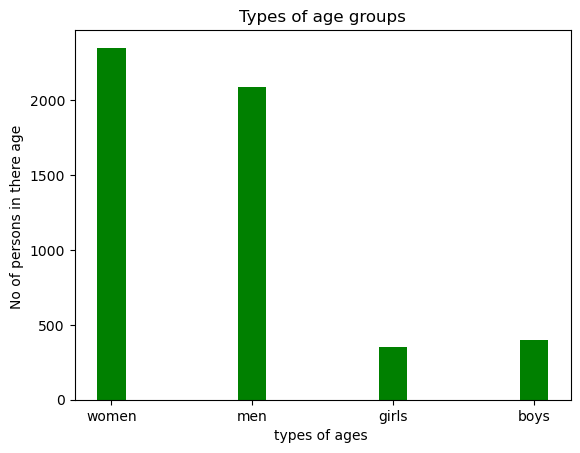

In [8]:
from matplotlib import pyplot as plt
plt.bar(ages,numbers,color='green',width=0.2)
plt.xlabel('types of ages ')
plt.ylabel('No of persons in there age ')
plt.title("Types of age groups")
plt.show()

# Visualization of avarage income based on age and gender

In [9]:
values = [int(women['income'].mean()),int(men['income'].mean()),int(girls['income'].mean()),int(boys['income'].mean())]

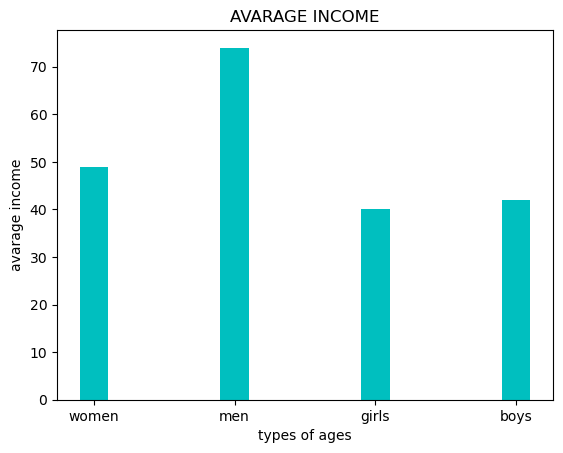

In [10]:
plt.bar(ages,values,color='c',width=0.2)
plt.xlabel('types of ages')
plt.ylabel('avarage income')
plt.title('AVARAGE INCOME')
plt.show()

# Visulazation of corelation of the coloums 

<AxesSubplot:>

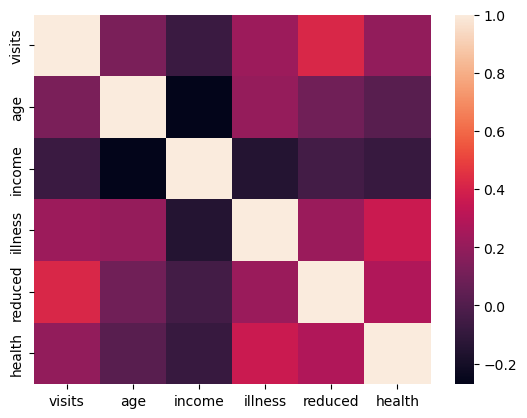

In [11]:
import seaborn as s
s.heatmap(df1.corr())

In [12]:
womens = df1.query('gender=="female"')

In [13]:
mens = df1.query('gender=="male"')

# Visulazation of reduced based on illness

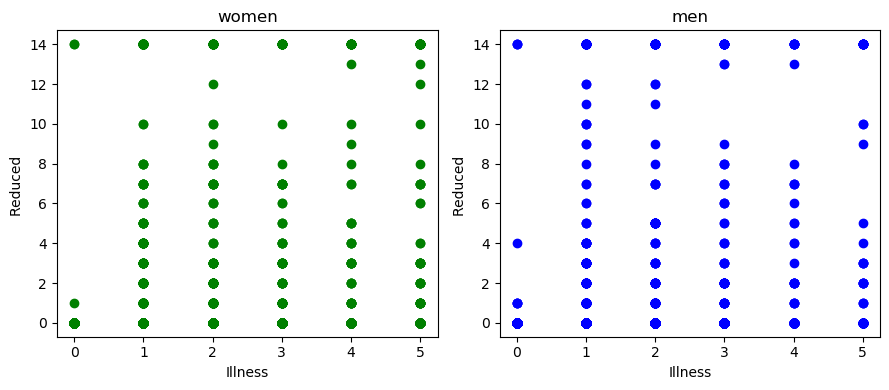

In [14]:
#plotting the two differer graphs in a single frame with the help of 'subplots' method 
figure,(x1,x2) = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
x1.scatter([womens.illness],[womens.reduced],color='green',label = 'women')
x1.set_xlabel('Illness')
x1.set_ylabel('Reduced ')
x1.set_title('women')
x2.scatter([mens.illness],[mens.reduced],color='blue',label = 'men')
x2.set_xlabel('Illness')
x2.set_ylabel('Reduced ')
x2.set_title('men')
plt.tight_layout()
plt.show()

In [15]:
x,y = df1.query('freepoor=="no" and freerepat=="no"').shape

In [16]:
print(f"There are {x} people who don't get the free poor and freerepat")

There are 3877 people who don't get the free poor and freerepat


In [26]:
z = df.query('freepoor=="no"').shape[0]
w = df.query('freepoor=="yes"').shape[0]
e = df.query('freerepat=="yes"').shape[0]
r = df.query('freerepat=="no"').shape[0]
values = [w,z]
values1= [e,r]
names = ["Yes","NO"]

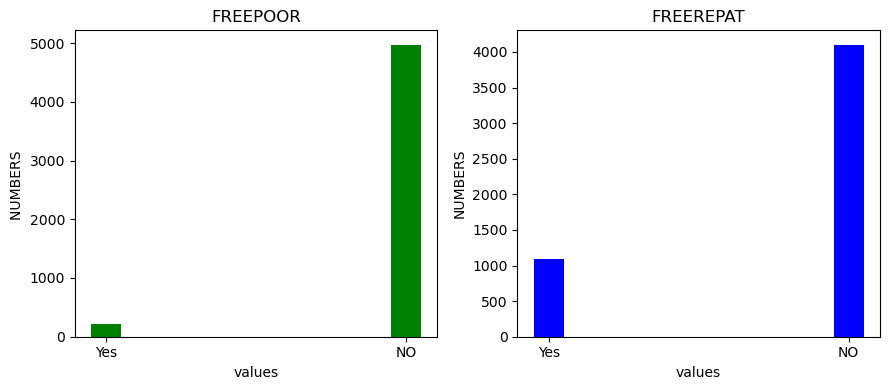

In [29]:
figure,(x1,x2) = plt.subplots(nrows=1,ncols=2,figsize=(9,4))
x1.bar(names,values,color='green',width=0.1)
x1.set_xlabel('values')
x1.set_ylabel('NUMBERS ')
x1.set_title('FREEPOOR')
x2.bar(names,values1,color='blue',width=0.1)
x2.set_xlabel('values')
x2.set_ylabel('NUMBERS')
x2.set_title('FREEREPAT')
plt.tight_layout()
plt.show()